# 1) Write a python program to display all the header tags from wikipedia.org.¶

In [1]:
!pip install bs4
!pip install requests

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
page = requests.get("https://en.wikipedia.org/wiki/Main_Page")
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content)

In [5]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"28e5f9ac-fb2c-40dd-abe9-d2ac383e5dae","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Main_Page","wgTitle":"Main Page","wgCurRevisionId":1106811004,"wgRevisionId":1106811004,"wgArticleId":15580374,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Main_Page","wgRelevantArticleId":15580374,"wgIsProbablyEditable":fals

In [6]:
html = requests.get("https://en.wikipedia.org/wiki/Main_Page")
titles = soup.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h1 class="firstHeading mw-first-heading" id="firstHeading" style="display: none"><span class="mw-page-title-main">Main Page</span></h1>

<h1><span class="mw-headline" id="Welcome_to_Wikipedia">Welcome to <a href="/wiki/Wikipedia" title="Wikipedia">Wikipedia</a></span></h1>

<h2 class="mp-h2" id="mp-tfa-h2"><span id="From_today.27s_featured_article"></span><span class="mw-headline" id="From_today's_featured_article">From today's featured article</span></h2>

<h2 class="mp-h2" id="mp-dyk-h2"><span class="mw-headline" id="Did_you_know_...">Did you know ...</span></h2>

<h2 class="mp-h2" id="mp-itn-h2"><span class="mw-headline" id="In_the_news">In the news</span></h2>

<h2 class="mp-h2" id="mp-otd-h2"><span class="mw-headline" id="On_this_day">On this day</span></h2>

<h2 class="mp-h2" id="mp-tfp-h2"><span id="Today.27s_featured_picture"></span><span class="mw-headline" id="Today's_featured_picture">Today's featured picture</span></h2>

<h2 class="mp-h2" id="mp

# 2) Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. name, rating, year of release)and make data frame.

In [7]:
!pip install bs4
!pip install requests

In [8]:

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [9]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [10]:

movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]


In [11]:
list = []

In [12]:
for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            }
    list.append(data)

In [13]:
for movie in list:
    
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'],')','-', movie['rating'])
    

1 - The Shawshank Redemption (1994 ) - 9.23470917898875
2 - The Godfather (1972 ) - 9.15655664510377
3 - The Dark Knight (2008 ) - 8.987454171972049
4 - The Godfather Part II (1974 ) - 8.984551961277218
5 - 12 Angry Men (1957 ) - 8.949299772472864
6 - Schindler's List (1993 ) - 8.936369816188254
7 - The Lord of the Rings: The Return of the King (2003 ) - 8.923476023476175
8 - Pulp Fiction (1994 ) - 8.849671071922623
9 - The Lord of the Rings: The Fellowship of the Ring (2001 ) - 8.804874092840596
1 -  Il buono, il brutto, il cattivo (1966 ) - 8.79264980608778
11 - Forrest Gump (1994 ) - 8.767738340719312
12 - Fight Club (1999 ) - 8.74924393049847
13 - Inception (2010 ) - 8.733023427651458
14 - The Lord of the Rings: The Two Towers (2002 ) - 8.729634572245791
15 - The Empire Strikes Back (1980 ) - 8.701333038769759
16 - The Matrix (1999 ) - 8.670568874505406
17 - Goodfellas (1990 ) - 8.652605574351698
18 - One Flew Over the Cuckoo's Nest (1975 ) - 8.640353596860358
19 - Se7en (1995 ) - 

In [14]:
df = pd.DataFrame(list)
df.to_csv('imdb_top__movies.csv',index=False)

In [15]:
df.head(100)

place                        movie_title             rating  year
0      1           The Shawshank Redemption   9.23470917898875  1994
1      2                      The Godfather   9.15655664510377  1972
2      3                    The Dark Knight  8.987454171972049  2008
3      4              The Godfather Part II  8.984551961277218  1974
4      5                       12 Angry Men  8.949299772472864  1957
..   ...                                ...                ...   ...
95    96                             Jagten   8.25591121252705  2012
96    97  M - Eine Stadt sucht einen Mörder  8.254317650417372  1931
97    98                 North by Northwest  8.252147275402018  1959
98    99                       Idi i smotri  8.247268523051758  1985
99    10                            Vertigo  8.246770487309625  1958

[100 rows x 4 columns]

# 3.Write a python program to display IMDB’s Top rated 100 Indian movies’ data (i.e. name, rating, year of release) and make data frame.

In [16]:
!pip install bs4
!pip install requests

In [17]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [18]:
url = 'https://www.imdb.com/india/top-rated-indian-movies/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [19]:
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]


In [20]:
list =[]

In [21]:
for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            }
    list.append(data)

In [22]:
df.head(100)

place                        movie_title             rating  year
0      1           The Shawshank Redemption   9.23470917898875  1994
1      2                      The Godfather   9.15655664510377  1972
2      3                    The Dark Knight  8.987454171972049  2008
3      4              The Godfather Part II  8.984551961277218  1974
4      5                       12 Angry Men  8.949299772472864  1957
..   ...                                ...                ...   ...
95    96                             Jagten   8.25591121252705  2012
96    97  M - Eine Stadt sucht einen Mörder  8.254317650417372  1931
97    98                 North by Northwest  8.252147275402018  1959
98    99                       Idi i smotri  8.247268523051758  1985
99    10                            Vertigo  8.246770487309625  1958

[100 rows x 4 columns]

In [23]:
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'],')','-', movie['rating'])
    

1 - Rocketry: The Nambi Effect (2022 ) - 8.530105644892178
2 - Anbe Sivam (2003 ) - 8.398599910908061
3 - Golmaal (1979 ) - 8.389866341216816
4 - Nayakan (1987 ) - 8.385699704333934
5 - Jai Bhim (2021 ) - 8.382865640852465
6 - Pariyerum Perumal (2018 ) - 8.37388328850264
7 - 3 Idiots (2009 ) - 8.35058533970835
8 - Apur Sansar (1959 ) - 8.347295476309776
9 - Manichitrathazhu (1993 ) - 8.328161998707984
1 -  Kumbalangi Nights (2019 ) - 8.314622769588103
11 - Black Friday (2004 ) - 8.312302903126929
12 - 777 Charlie (2022 ) - 8.310948364793372
13 - C/o Kancharapalem (2018 ) - 8.300604390879913
14 - Soorarai Pottru (2020 ) - 8.300405232186119
15 - #Home (2021 ) - 8.299825542717311
16 - Taare Zameen Par (2007 ) - 8.298706349570656
17 - Kireedam (1989 ) - 8.282723716995305
18 - Dangal (2016 ) - 8.281758316607494
19 - Kaithi (2019 ) - 8.278718757202176
20 - Jersey (2019 ) - 8.266229994625709
21 - 96 (2018 ) - 8.24400986558345
22 - Asuran (2019 ) - 8.242978891250566
23 - Thevar Magan (1992 ) -

In [24]:
df = pd.DataFrame(list)
df.to_csv('imdb_top__movies.csv',index=False)

In [25]:
df.head(100)

place                  movie_title             rating  year
0      1   Rocketry: The Nambi Effect  8.530105644892178  2022
1      2                   Anbe Sivam  8.398599910908061  2003
2      3                      Golmaal  8.389866341216816  1979
3      4                      Nayakan  8.385699704333934  1987
4      5                     Jai Bhim  8.382865640852465  2021
..   ...                          ...                ...   ...
95    96              Rang De Basanti  8.013507751080361  2006
96    97  Baahubali 2: The Conclusion  8.012510675676918  2017
97    98                       Baasha  8.010591034198436  1995
98    99                       Masaan  8.007144409986076  2015
99    10                    Virumandi  8.006676461914664  2004

[100 rows x 4 columns]

# 4) Write s python program to display list of respected former presidents of India(i.e. Name , Term of office) from https://presidentofindia.nic.in/former-presidents.htm

In [2]:
!pip install bs4
!pip install requests

In [3]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [4]:
page = requests.get('https://presidentofindia.nic.in/former-presidents.htm')
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.content)

In [6]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head id="Head1"><title>
	Former Presidents - The President of India
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="no-cache" http-equiv="pragma"/>
<!--<meta http-equiv="Content-Style-Type" content="text/css" /><meta http-equiv="Content-Script-Type" content="type" />-->
<meta content="telephone=no" name="format-detection"/><meta content="IE=EmulateIE10" http-equiv="X-UA-Compatible"/>
<!-- Start Favicon -->
<link href="favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="js/panorama_viewer.css" rel="stylesheet" type="text/css"/>
<!-- Start Viewport -->
<!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" />-->
<!-- Start IE CSS -->
<!--[if IE]>
	<link href="writereaddata/Portal/Design_CSS/5.

In [7]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head id="Head1">
  <title>
   Former Presidents - The President of India
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <!--<meta http-equiv="Content-Style-Type" content="text/css" /><meta http-equiv="Content-Script-Type" content="type" />-->
  <meta content="telephone=no" name="format-detection"/>
  <meta content="IE=EmulateIE10" http-equiv="X-UA-Compatible"/>
  <!-- Start Favicon -->
  <link href="favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="js/panorama_viewer.css" rel="stylesheet" type="text/css"/>
  <!-- Start Viewport -->
  <!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" />-->
  <!-- Start IE CSS -->
  <!--[if IE]>
	<link href

In [8]:
scraped_formerPresidents = soup.find_all('div',class_='presidentListing')
scraped_formerPresidents

[<div class="presidentListing">
 <h3>Shri Ram Nath Kovind (birth - 1945)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2017 to 25 July, 2022 </p>
 <p><a href="https://ramnathkovind.nic.in" target="_blank">https://ramnathkovind.nic.in</a></p>
 </div>,
 <div class="presidentListing">
 <h3>Shri Pranab Mukherjee (1935-2020)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2012 to 25 July, 2017 </p>
 <p><a href="http://pranabmukherjee.nic.in" target="_blank">http://pranabmukherjee.nic.in</a></p>
 </div>,
 <div class="presidentListing">
 <h3>Smt Pratibha Devisingh Patil (birth - 1934)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2007 to 25 July, 2012 </p>
 <p><a href="http://pratibhapatil.nic.in" target="_blank">http://pratibhapatil.nic.in</a></p>
 </div>,
 <div class="presidentListing">
 <h3>DR. A.P.J. Abdul Kalam (1931-2015)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2002 to 25 July, 2007 </p>
 <p><a href="http://abdulkalam.nic.i

In [9]:
formerPresidents = []
for formerPresident in scraped_formerPresidents:
    print(formerPresident.get_text())


Shri Ram Nath Kovind (birth - 1945)
Term of Office: 25 July, 2017 to 25 July, 2022 
https://ramnathkovind.nic.in


Shri Pranab Mukherjee (1935-2020)
Term of Office: 25 July, 2012 to 25 July, 2017 
http://pranabmukherjee.nic.in


Smt Pratibha Devisingh Patil (birth - 1934)
Term of Office: 25 July, 2007 to 25 July, 2012 
http://pratibhapatil.nic.in


DR. A.P.J. Abdul Kalam (1931-2015)
Term of Office: 25 July, 2002 to 25 July, 2007 
http://abdulkalam.nic.in


Shri K. R. Narayanan (1920 - 2005)
Term of Office: 25 July, 1997 to 25 July, 2002 


Dr Shankar Dayal Sharma (1918-1999)
Term of Office: 25 July, 1992 to 25 July, 1997 


Shri R Venkataraman (1910-2009)
Term of Office: 25 July, 1987 to 25 July, 1992 


Giani Zail Singh (1916-1994)
Term of Office: 25 July, 1982 to 25 July, 1987 


Shri Neelam Sanjiva Reddy (1913-1996)
Term of Office: 25 July, 1977 to 25 July, 1982 


Dr. Fakhruddin Ali Ahmed (1905-1977)
Term of Office: 24 August, 1974 to 11 February, 1977


Shri Varahagiri Venkata Gi

# 5) Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape:
a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.
b) Top 10 ODI Batsmen along with the records of their team and rating.
c) Top 10 ODI bowlers along with the records of their team and rating.


# a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.

In [3]:
!pip install bs4
!pip install requests

In [4]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [5]:
page = requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
page

<Response [200]>

In [6]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Men's ODI Team Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Men's ODI Team Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-t

In [7]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Men's ODI Team Rankings | ICC" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Men's ODI Team Rankings | ICC" property="og:title"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i

In [8]:
#Scraping ODI teams
scraped_odi_teams = soup.find_all('span',class_='u-hide-phablet')
scraped_odi_teams

#creating empty list to store Data
odi_teams = []


#parsing ODI teams
for odi_team in scraped_odi_teams[:10]:
    odi_team = odi_team.get_text().replace('\n',"")
    odi_team = odi_team.strip("")
    odi_teams.append(odi_team)
odi_teams    

['New Zealand',
 'England',
 'India',
 'Pakistan',
 'Australia',
 'South Africa',
 'Bangladesh',
 'Sri Lanka',
 'West Indies',
 'Afghanistan']

In [9]:
df = pd.DataFrame({'Teams':odi_teams})
df

Teams
0   New Zealand
1       England
2         India
3      Pakistan
4     Australia
5  South Africa
6    Bangladesh
7     Sri Lanka
8   West Indies
9   Afghanistan

In [10]:
top_bteam_matches = []
top_bteam_points = []
top_bteam_rating = []
name=soup.find('td',class_="rankings-block__banner--matches")
top_bteam_matches.append(name.text)

name=soup.find('td',class_="rankings-block__banner--matches")
top_bteam_points.append(name.text.strip())

name=soup.find('td',class_="rankings-block__banner--matches")
top_bteam_rating.append(name.text.strip())

In [11]:
df1 = pd.DataFrame({'Matches':top_bteam_matches,'Points':top_bteam_points,'Rating':top_bteam_rating})
df1

Matches Points Rating
0      19     19     19

In [12]:
matches = []
for i in soup.find_all('td',class_="table-body__cell u-center-text")[:18]:
    matches.append(i.text)
matches


match1 = []
for i in range(0,len(matches),2)[:18]:
    match1.append(matches[i])
match1        

['27', '31', '22', '25', '21', '30', '29', '41', '18']

In [13]:
points = []
for i in soup.find_all('td',class_="table-body__cell u-center-text")[:20]:
    points.append(i.text)
points


points1 = []
for i in range(1,len(matches),2)[:20]:
    points1.append(matches[i])
points1        

['3,226',
 '3,447',
 '2,354',
 '2,548',
 '2,111',
 '2,753',
 '2,658',
 '2,902',
 '1,238']

In [14]:
ratings = []
for i in soup.find_all('td',class_="table-body__cell u-text-right rating")[:9]:
    ratings.append(i.text)
ratings

['119', '111', '107', '102', '101', '92', '92', '71', '69']

In [15]:
print(len(match1),len(points1),len(ratings))

9 9 9


In [16]:
df2 = pd.DataFrame({'Matches':match1,'Points':points1,'Rating':ratings})
df2

Matches Points Rating
0      27  3,226    119
1      31  3,447    111
2      22  2,354    107
3      25  2,548    102
4      21  2,111    101
5      30  2,753     92
6      29  2,658     92
7      41  2,902     71
8      18  1,238     69

In [17]:
df3 = pd.concat([df1[:1],df2[:10]])
df3

Matches Points Rating
0      19     19     19
0      27  3,226    119
1      31  3,447    111
2      22  2,354    107
3      25  2,548    102
4      21  2,111    101
5      30  2,753     92
6      29  2,658     92
7      41  2,902     71
8      18  1,238     69

# b) Top 10 ODI Batsmen along with the records of their team and rating.

In [18]:
page = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi')
page

<Response [200]>

In [19]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Men's ODI Player Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Men's ODI Player Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og

In [20]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Men's ODI Player Rankings | ICC" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Men's ODI Player Rankings | ICC" property="og:title"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnai

In [21]:
rank=soup.find_all("span",attrs={"class":["rankings-block__pos-number","rankings-table__pos-number"]})
rank

ranks=[]
for ranking in rank:
    ranking=ranking.get_text().replace('\n',"")
    ranking=ranking.strip()
    ranks.append(ranking)
ranks=ranks[0:10]
ranks

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [22]:
player_name=soup.find_all('td',class_='table-body__cell name')
player_name.insert(0,(soup.find('div',class_='rankings-block__banner--name')))
player_name

[<div class="rankings-block__banner--name">Babar Azam</div>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1277">Rassie van der Dussen</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/834">Quinton de Kock</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1568">Imam-ul-Haq</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/164">Virat Kohli</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/107">Rohit Sharma</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/170">David Warner</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/506">Jonny Bairstow</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/226">Ross Taylor</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-ra

In [23]:
name=[]
for player in player_name:
    player=player.get_text().replace('\n',"")
    player=player.strip()
    name.append(player)
name=name[0:10]
name

['Babar Azam',
 'Rassie van der Dussen',
 'Quinton de Kock',
 'Imam-ul-Haq',
 'Virat Kohli',
 'Rohit Sharma',
 'David Warner',
 'Jonny Bairstow',
 'Ross Taylor',
 'Aaron Finch']

In [24]:
team=soup.find_all(attrs={"class":["table-body__logo-text"]})
team=team[2:3]
team

[<span class="table-body__logo-text">PAK</span>]

In [25]:
top=[]
for m in team:
    m=m.get_text().replace('\n',"")
    top.append(m)
top    

['PAK']

In [26]:
team1=soup.find_all(attrs={"class":["table-body__logo-text"]})
team1=team1[0:9]
team1

[<span class="table-body__logo-text">SA</span>,
 <span class="table-body__logo-text">SA</span>,
 <span class="table-body__logo-text">PAK</span>,
 <span class="table-body__logo-text">IND</span>,
 <span class="table-body__logo-text">IND</span>,
 <span class="table-body__logo-text">AUS</span>,
 <span class="table-body__logo-text">ENG</span>,
 <span class="table-body__logo-text">NZ</span>,
 <span class="table-body__logo-text">AUS</span>]

In [27]:
teams=[]
for tm in team1:
    tm=tm.get_text().replace('\n',"")
    teams.append(tm)
teams    

['SA', 'SA', 'PAK', 'IND', 'IND', 'AUS', 'ENG', 'NZ', 'AUS']

In [28]:
team_name=top+teams
team_name

['PAK', 'SA', 'SA', 'PAK', 'IND', 'IND', 'AUS', 'ENG', 'NZ', 'AUS']

In [29]:
ratings=soup.find_all(attrs={"class":["rankings-block__banner--rating","table-body__cell u-text right"]})
ratings

[<div class="rankings-block__banner--rating">890</div>,
 <div class="rankings-block__banner--rating">720</div>,
 <div class="rankings-block__banner--rating">372</div>,
 <div class="rankings-block__banner--rating">890</div>,
 <div class="rankings-block__banner--rating">720</div>,
 <div class="rankings-block__banner--rating">372</div>]

In [30]:
rating=[]
for rate in ratings:
    rate=rate.get_text().replace('\n',"")
    rate=rate.strip()
    rating.append(rate)
rating=rating[0:10]
rating

['890', '720', '372', '890', '720', '372']

In [31]:
df = pd.DataFrame(list(zip(ranks,name,team_name,rating)),columns=['Ranks','Name','Team','Rating'])
df

Ranks                   Name Team Rating
0     1             Babar Azam  PAK    890
1     2  Rassie van der Dussen   SA    720
2     3        Quinton de Kock   SA    372
3     4            Imam-ul-Haq  PAK    890
4     5            Virat Kohli  IND    720
5     6           Rohit Sharma  IND    372

# c) Top 10 ODI bowlers along with the records of their team and rating.

In [32]:
page = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi')
page

<Response [200]>

In [33]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Men's ODI Player Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Men's ODI Player Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og

In [34]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Men's ODI Player Rankings | ICC" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Men's ODI Player Rankings | ICC" property="og:title"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnai

In [35]:
bowl=soup.select("tr.table-body a")
bowl=bowl[9:18]
bowl

[<a href="/rankings/mens/player-rankings/857">Josh Hazlewood</a>,
 <a href="/rankings/mens/player-rankings/4572">Mujeeb Ur Rahman</a>,
 <a href="/rankings/mens/player-rankings/1124">Jasprit Bumrah</a>,
 <a href="/rankings/mens/player-rankings/4530">Shaheen Afridi</a>,
 <a href="/rankings/mens/player-rankings/618">Mohammad Nabi</a>,
 <a href="/rankings/mens/player-rankings/1597">Mehedi Hasan</a>,
 <a href="/rankings/mens/player-rankings/2885">Rashid Khan</a>,
 <a href="/rankings/mens/player-rankings/1505">Matt Henry</a>,
 <a href="/rankings/mens/player-rankings/1594">Mustafizur Rahman</a>]

In [36]:
top=soup.find_all(class_="rankings-block__banner--name")[1]
top

<div class="rankings-block__banner--name">Trent Boult</div>

In [37]:
bowl.insert(0,top)
bowl

[<div class="rankings-block__banner--name">Trent Boult</div>,
 <a href="/rankings/mens/player-rankings/857">Josh Hazlewood</a>,
 <a href="/rankings/mens/player-rankings/4572">Mujeeb Ur Rahman</a>,
 <a href="/rankings/mens/player-rankings/1124">Jasprit Bumrah</a>,
 <a href="/rankings/mens/player-rankings/4530">Shaheen Afridi</a>,
 <a href="/rankings/mens/player-rankings/618">Mohammad Nabi</a>,
 <a href="/rankings/mens/player-rankings/1597">Mehedi Hasan</a>,
 <a href="/rankings/mens/player-rankings/2885">Rashid Khan</a>,
 <a href="/rankings/mens/player-rankings/1505">Matt Henry</a>,
 <a href="/rankings/mens/player-rankings/1594">Mustafizur Rahman</a>]

In [38]:
name=[]
for nm in bowl:
    nm=nm.get_text().replace('\n',"")
    nm=nm.strip()
    name.append(nm)
name    

['Trent Boult',
 'Josh Hazlewood',
 'Mujeeb Ur Rahman',
 'Jasprit Bumrah',
 'Shaheen Afridi',
 'Mohammad Nabi',
 'Mehedi Hasan',
 'Rashid Khan',
 'Matt Henry',
 'Mustafizur Rahman']

In [39]:
team=soup.select("span.table-body__logo-text")
team=team[9:18]
team

[<span class="table-body__logo-text">AUS</span>,
 <span class="table-body__logo-text">AFG</span>,
 <span class="table-body__logo-text">IND</span>,
 <span class="table-body__logo-text">PAK</span>,
 <span class="table-body__logo-text">AFG</span>,
 <span class="table-body__logo-text">BAN</span>,
 <span class="table-body__logo-text">AFG</span>,
 <span class="table-body__logo-text">NZ</span>,
 <span class="table-body__logo-text">BAN</span>]

In [40]:
teams=[]
for tm in team:
    tm=tm.get_text().replace('\n',"")
    teams.append(tm)
teams    

['AUS', 'AFG', 'IND', 'PAK', 'AFG', 'BAN', 'AFG', 'NZ', 'BAN']

In [41]:
top2=soup.select("span.table-body__logo-text")[16:17]
top2

[<span class="table-body__logo-text">NZ</span>]

In [42]:
team1=[]
for tm in top2:
    tm=tm.get_text().replace('\n',"")
    team1.append(tm)
team1    

['NZ']

In [43]:
team_name=team1+teams
team_name

['NZ', 'AUS', 'AFG', 'IND', 'PAK', 'AFG', 'BAN', 'AFG', 'NZ', 'BAN']

In [44]:
rate=soup.find_all("td",class_="table-body__cell u-text-right rating")[9:18]
rate

[<td class="table-body__cell u-text-right rating">678</td>,
 <td class="table-body__cell u-text-right rating">676</td>,
 <td class="table-body__cell u-text-right rating">662</td>,
 <td class="table-body__cell u-text-right rating">661</td>,
 <td class="table-body__cell u-text-right rating">657</td>,
 <td class="table-body__cell u-text-right rating">655</td>,
 <td class="table-body__cell u-text-right rating">651</td>,
 <td class="table-body__cell u-text-right rating">644</td>,
 <td class="table-body__cell u-text-right rating">640</td>]

In [45]:
top3=soup.select("div.rankings-block__banner--rating")[1]
top3

<div class="rankings-block__banner--rating">720</div>

In [46]:
rate.insert(0,top3)
rate

[<div class="rankings-block__banner--rating">720</div>,
 <td class="table-body__cell u-text-right rating">678</td>,
 <td class="table-body__cell u-text-right rating">676</td>,
 <td class="table-body__cell u-text-right rating">662</td>,
 <td class="table-body__cell u-text-right rating">661</td>,
 <td class="table-body__cell u-text-right rating">657</td>,
 <td class="table-body__cell u-text-right rating">655</td>,
 <td class="table-body__cell u-text-right rating">651</td>,
 <td class="table-body__cell u-text-right rating">644</td>,
 <td class="table-body__cell u-text-right rating">640</td>]

In [47]:
ratings=[]
for rt in rate:
    rt=rt.get_text().replace('\n',"")
    rt=rt.strip()
    ratings.append(rt)
ratings    

['720', '678', '676', '662', '661', '657', '655', '651', '644', '640']

In [49]:
df=pd.DataFrame({"Players":name,"Team":team_name,"Rating:ratings"})
df

Players Team Rating
0        Trent Boult   NZ    720
1     Josh Hazlewood  AUS    678
2   Mujeeb Ur Rahman  AFG    676
3     Jasprit Bumrah  IND    662
4     Shaheen Afridi  PAK    661
5      Mohammad Nabi  AFG    657
6       Mehedi Hasan  BAN    655
7        Rashid Khan  AFG    651
8         Matt Henry   NZ    644
9  Mustafizur Rahman  BAN    640

# 6) Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape:
a) Top 10 ODI teams in women’s cricket along with the records for matches, points and rating.
b) Top 10 women’s ODI Batting players along with the records of their team and rating.
c) Top 10 women’s ODI all-rounder along with the records of their team and rating

# a) Top 10 ODI teams in women’s cricket along with the records for matches, points and rating.

In [96]:
!pip install bs4
!pip install requests

In [97]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [99]:
page = requests.get('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')
page

<Response [200]>

In [100]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Women's ODI Team Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Women's ODI Team Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:i

In [101]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Women's ODI Team Rankings | ICC" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Women's ODI Team Rankings | ICC" property="og:title"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.

In [102]:
#Scraping ODI teams
scraped_odi_teams = soup.find_all('span',class_='u-hide-phablet')
scraped_odi_teams

#creating empty list to store Data
odi_teams = []


#parsing ODI teams
for odi_team in scraped_odi_teams[:10]:
    odi_team = odi_team.get_text().replace('\n',"")
    odi_team = odi_team.strip("")
    odi_teams.append(odi_team)
odi_teams    

['Australia',
 'England',
 'South Africa',
 'India',
 'New Zealand',
 'West Indies',
 'Bangladesh',
 'Pakistan',
 'Ireland',
 'Sri Lanka']

In [103]:
df = pd.DataFrame({'Teams':odi_teams})
df

Teams
0     Australia
1       England
2  South Africa
3         India
4   New Zealand
5   West Indies
6    Bangladesh
7      Pakistan
8       Ireland
9     Sri Lanka

In [104]:
top_bteam_matches = []
top_bteam_points = []
top_bteam_rating = []
name=soup.find('td',class_="rankings-block__banner--matches")
top_bteam_matches.append(name.text)

name=soup.find('td',class_="rankings-block__banner--matches")
top_bteam_points.append(name.text.strip())

name=soup.find('td',class_="rankings-block__banner--matches")
top_bteam_rating.append(name.text.strip())

In [105]:
df1 = pd.DataFrame({'Matches':top_bteam_matches,'Points':top_bteam_points,'Rating':top_bteam_rating})
df1

Matches Points Rating
0      29     29     29

In [106]:
matches = []
for i in soup.find_all('td',class_="table-body__cell u-center-text")[:18]:
    matches.append(i.text)
matches


match1 = []
for i in range(0,len(matches),2)[:18]:
    match1.append(matches[i])
match1        

['33', '35', '32', '31', '30', '12', '30', '11', '11']

In [107]:
points = []
for i in soup.find_all('td',class_="table-body__cell u-center-text")[:20]:
    points.append(i.text)
points


points1 = []
for i in range(1,len(matches),2)[:20]:
    points1.append(matches[i])
points1        

['4,046', '4,157', '3,219', '3,019', '2,768', '930', '1,962', '516', '495']

In [108]:
ratings = []
for i in soup.find_all('td',class_="table-body__cell u-text-right rating")[:9]:
    ratings.append(i.text)
ratings

['123', '119', '101', '97', '92', '78', '65', '47', '45']

In [109]:
print(len(match1),len(points1),len(ratings))

9 9 9


In [110]:
df2 = pd.DataFrame({'Matches':match1,'Points':points1,'Rating':ratings})
df2

Matches Points Rating
0      33  4,046    123
1      35  4,157    119
2      32  3,219    101
3      31  3,019     97
4      30  2,768     92
5      12    930     78
6      30  1,962     65
7      11    516     47
8      11    495     45

In [111]:
df3 = pd.concat([df1[:1],df2[:10]])
df3

Matches Points Rating
0      29     29     29
0      33  4,046    123
1      35  4,157    119
2      32  3,219    101
3      31  3,019     97
4      30  2,768     92
5      12    930     78
6      30  1,962     65
7      11    516     47
8      11    495     45

# b) Top 10 women’s ODI Batting players along with the records of their team and rating.

In [112]:
page = requests.get('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')
page

<Response [200]>

In [113]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Women's ODI Team Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Women's ODI Team Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:i

In [114]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Women's ODI Team Rankings | ICC" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Women's ODI Team Rankings | ICC" property="og:title"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.

In [116]:
rank=soup.find_all("span",attrs={"class":["rankings-block__pos-number","rankings-table__pos-number"]})
rank

ranks=[]
for ranking in rank:
    ranking=ranking.get_text().replace('\n',"")
    ranking=ranking.strip()
    ranks.append(ranking)
ranks=ranks[0:10]
ranks

[]

# 7.Write a python program to scrape mentioned news details from https://www.cnbc.com/world/?region=world :i) Headline ii) Time iii) News Link

In [1]:
!pip install bs4
!pip install requests

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [3]:
page = requests.get('https://www.cnbc.com/world/?region=world')
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-rede

In [5]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#">
 <head>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" hr

In [6]:
for link in soup.findAll("a"):
    print("Headlines : {}".format(link.text))

Headlines : Skip Navigation
Headlines : 
Headlines : 
Headlines : Markets
Headlines : Pre-Markets
Headlines : U.S. Markets
Headlines : Europe Markets
Headlines : China Markets
Headlines : Asia Markets
Headlines : World Markets
Headlines : Currencies
Headlines : Cryptocurrency
Headlines : Futures & Commodities
Headlines : Bonds
Headlines : Funds & ETFs
Headlines : Business
Headlines : Economy
Headlines : Finance
Headlines : Health & Science
Headlines : Media
Headlines : Real Estate
Headlines : Energy
Headlines : Climate
Headlines : Transportation
Headlines : Industrials
Headlines : Retail
Headlines : Wealth
Headlines : Life
Headlines : Small Business
Headlines : Investing
Headlines : Personal Finance
Headlines : Fintech
Headlines : Financial Advisors
Headlines : Options Action
Headlines : ETF Street
Headlines : Buffett Archive
Headlines : Earnings
Headlines : Trader Talk
Headlines : Tech
Headlines : Cybersecurity
Headlines : Enterprise
Headlines : Internet
Headlines : Media
Headlines : 

In [7]:
for link in soup.findAll('time',{'class' : 'LatestNews-timestamp'}):
    print("Times : {}".format(link.text))

Times : 2 Hours Ago
Times : 2 Hours Ago
Times : 4 Hours Ago
Times : 4 Hours Ago
Times : 4 Hours Ago
Times : 5 Hours Ago
Times : 6 Hours Ago
Times : 6 Hours Ago
Times : 6 Hours Ago
Times : 7 Hours Ago
Times : 7 Hours Ago
Times : 7 Hours Ago
Times : 7 Hours Ago
Times : 7 Hours Ago
Times : 8 Hours Ago
Times : 8 Hours Ago
Times : 8 Hours Ago
Times : 8 Hours Ago
Times : 8 Hours Ago
Times : 8 Hours Ago
Times : 9 Hours Ago
Times : 9 Hours Ago
Times : 9 Hours Ago
Times : 10 Hours Ago
Times : 10 Hours Ago
Times : 10 Hours Ago
Times : 10 Hours Ago
Times : 10 Hours Ago
Times : 10 Hours Ago
Times : 10 Hours Ago


In [8]:
cnbc_url="https://www.cnbc.com/world"


In [9]:
page = requests.get('https://www.cnbc.com/world')
page

<Response [200]>

In [10]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-rede

In [11]:
links_list = soup.find_all('a')

In [12]:
for link in links_list:
    if 'href'in link.attrs:
        print(str(link.attrs['href']))

#MainContent
//www.cnbc.com/world/
/
/markets/
/pre-markets/
/us-markets/
/markets-europe/
/china-markets/
/markets-asia-pacific/
/world-markets/
/currencies/
/cryptocurrency/
/futures-and-commodities/
/bonds/
/funds-and-etfs/
/business/
/economy/
/finance/
/health-and-science/
/media/
/real-estate/
/energy/
/climate/
/transportation/
/industrials/
/retail/
/wealth/
/life/
/small-business/
/investing/
/personal-finance/
/fintech/
/financial-advisors/
/options-action/
/etf-street/
https://buffett.cnbc.com
/earnings/
/trader-talk/
/technology/
/cybersecurity/
/enterprise/
/internet/
/media/
/mobile/
/social-media/
/cnbc-disruptors/
/tech-guide/
/politics/
/white-house/
/policy/
/defense/
/congress/
/equity-opportunity/
/europe-politics/
/china-politics/
/asia-politics/
/world-politics/
/tv/
/live-audio/
/latest-video/
/top-video/
/video-ceo-interviews/
/europe-television/
/asia-business-day/
/podcast/
/digital-original/
/watchlist/
/investingclub/
/investingclub/cramer-trade-alert/
/inve

# 8) Write a python program to scrape the details of most downloaded articles from AI in last 90 days.
https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles Scrape below mentioned details : i) Paper Title ii) Authors iii) Published Date iv) Paper URL

In [13]:
!pip install bs4
!pip install requests

In [14]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [15]:
page = requests.get('https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles')
page

<Response [200]>

In [16]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html><head><link as="font" crossorigin="" href="/fonts/NexusSansWebPro-Regular.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="/fonts/ElsevierGulliver-Regular.woff2" rel="preload" type="font/woff2"/><script src="//assets.adobedtm.com/4a848ae9611a/4da1513b0562/launch-a536f9fbceee.min.js"></script><meta name="next-font-preconnect"/><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><meta content="en_US" name="og:locale"/><meta content="Most Downloaded Articles - Artificial Intelligence - Journal - Elsevier" property="og:title"/><meta content="The journal of Artificial Intelligence (AIJ)  welcomes papers on broad aspects of AI that constitute advances in the overall field including, but not limited …" property="og:description"/><meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image" property="og:image"/><meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image:url" prop

In [17]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <link as="font" crossorigin="" href="/fonts/NexusSansWebPro-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/fonts/ElsevierGulliver-Regular.woff2" rel="preload" type="font/woff2"/>
  <script src="//assets.adobedtm.com/4a848ae9611a/4da1513b0562/launch-a536f9fbceee.min.js">
  </script>
  <meta name="next-font-preconnect"/>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="en_US" name="og:locale"/>
  <meta content="Most Downloaded Articles - Artificial Intelligence - Journal - Elsevier" property="og:title"/>
  <meta content="The journal of Artificial Intelligence (AIJ)  welcomes papers on broad aspects of AI that constitute advances in the overall field including, but not limited …" property="og:description"/>
  <meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image" property="og:image"/>
  <meta content="http://ars.els-cdn.com/content/image/X

In [18]:
for link in soup.findAll("h2"):
    print("PaperTitle : {}".format(link.text))

PaperTitle : Reward is enough
PaperTitle : Making sense of raw input
PaperTitle : Law and logic: A review from an argumentation perspective
PaperTitle : Creativity and artificial intelligence
PaperTitle : Artificial cognition for social human–robot interaction: An implementation
PaperTitle : Explanation in artificial intelligence: Insights from the social sciences
PaperTitle : Making sense of sensory input
PaperTitle : Conflict-based search for optimal multi-agent pathfinding
PaperTitle : Between MDPs and semi-MDPs: A framework for temporal abstraction in reinforcement learning
PaperTitle : The Hanabi challenge: A new frontier for AI research
PaperTitle : Evaluating XAI: A comparison of rule-based and example-based explanations
PaperTitle : Argumentation in artificial intelligence
PaperTitle : Algorithms for computing strategies in two-player simultaneous move games
PaperTitle : Multiple object tracking: A literature review
PaperTitle : Selection of relevant features and examples in ma

In [19]:
author = []

for i in soup.find_all('span',{'class' : "sc-1w3fpd7-0 pgLAT"}):
    author.append(i.text)

In [20]:
author

['Silver, David, Singh, Satinder, Precup, Doina, Sutton, Richard S. ',
 'Evans, Richard, Bošnjak, Matko and 5 more',
 'Prakken, Henry, Sartor, Giovanni ',
 'Boden, Margaret A. ',
 'Lemaignan, Séverin, Warnier, Mathieu and 3 more',
 'Miller, Tim ',
 'Evans, Richard, Hernández-Orallo, José and 3 more',
 'Sharon, Guni, Stern, Roni, Felner, Ariel, Sturtevant, Nathan R. ',
 'Sutton, Richard S., Precup, Doina, Singh, Satinder ',
 'Bard, Nolan, Foerster, Jakob N. and 13 more',
 'van der Waa, Jasper, Nieuwburg, Elisabeth, Cremers, Anita, Neerincx, Mark ',
 'Bench-Capon, T.J.M., Dunne, Paul E. ',
 'Bošanský, Branislav, Lisý, Viliam and 3 more',
 'Luo, Wenhan, Xing, Junliang and 4 more',
 'Blum, Avrim L., Langley, Pat ',
 'Arora, Saurabh, Doshi, Prashant ',
 'Aas, Kjersti, Jullum, Martin, Løland, Anders ',
 'Kliegr, Tomáš, Bahník, Štěpán, Fürnkranz, Johannes ',
 'Pereira, Gonçalo, Prada, Rui, Santos, Pedro A. ',
 'Riveiro, Maria, Thill, Serge ',
 'Kenny, Eoin M., Ford, Courtney, Quinn, Molly, Ke

In [21]:
date = []

for i in soup.find_all('span',{'class' : 'sc-1thf9ly-2 bKddwo'}):
    date.append(i.text)

In [22]:
date

['October 2021',
 'October 2021',
 'October 2015',
 'August 1998',
 'June 2017',
 'February 2019',
 'April 2021',
 'February 2015',
 'August 1999',
 'March 2020',
 'February 2021',
 'October 2007',
 'August 2016',
 'April 2021',
 'December 1997',
 'August 2021',
 'September 2021',
 'June 2021',
 'December 2016',
 'September 2021',
 'May 2021',
 'January 2014',
 'December 1997',
 'October 2021',
 'February 2010']

In [23]:
url = "https://www.journals.elsevier.com"

In [24]:
page = requests.get('https://www.journals.elsevier.com') 
page

<Response [200]>

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Elsevier" name="author"/>
<meta content="0-8Ig3YtfzbeUxQdZ-TM_y8P_se41D4JrW3e0o8xgdk" name="google-site-verification"/>
<meta content="#da532c" name="msapplication-TileColor"/>
<meta content="//design.elsevier.com/public/icon-set/elsevier/favicon-32px.svg" name="msapplication-TileImage"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="144399" name="asssetID"/>
<!-- Preconnect -->
<link crossorigin="" href="https://cdn.cookielaw.org" rel="preconnect"/>
<link crossorigin="" href="https://cdn.elsevier.io" rel="preconnect"/>
<link href="https://assets.adobedtm.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://dpm.demdex.net" rel="preconnect"/>
<link href="https://cm.everesttech.net" rel="preconnect"/>
<
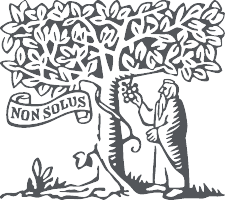
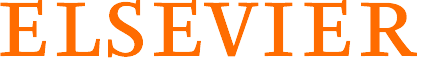

In [25]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <meta content="Elsevier" name="author"/>
   <meta content="0-8Ig3YtfzbeUxQdZ-TM_y8P_se41D4JrW3e0o8xgdk" name="google-site-verification">
    <meta content="#da532c" name="msapplication-TileColor"/>
    <meta content="//design.elsevier.com/public/icon-set/elsevier/favicon-32px.svg" name="msapplication-TileImage"/>
    <meta content="unsafe-url" name="referrer"/>
    <meta content="144399" name="asssetID"/>
    <!-- Preconnect -->
    <link crossorigin="" href="https://cdn.cookielaw.org" rel="preconnect"/>
    <link crossorigin="" href="https://cdn.elsevier.io" rel="preconnect"/>
    <link href="https://assets.adobedtm.com" rel="preconnect"/>
    <link href="https://www.googletagmanager.com" rel="preconnect"/>
    <link href="https://dpm.demdex.net" rel="preconnect"/>
    <link
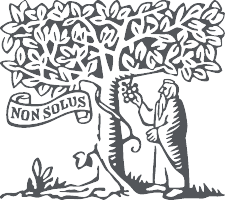
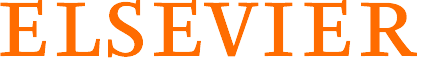

In [26]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

In [27]:
links_list = soup.find_all('a')

In [28]:
for link in links_list:
    if 'href'in link.attrs:
        print(str(link.attrs['href']))

#maincontent
https://www.elsevier.com
https://www.elsevier.com/about
https://www.elsevier.com/about
https://www.elsevier.com/connect
/about/careers
https://www.elsevier.com/open-science
https://www.elsevier.com/solutions
https://www.elsevier.com/rd-solutions
https://www.elsevier.com/clinical-solutions
https://www.elsevier.com/research-platforms
https://www.elsevier.com/research-intelligence
https://www.elsevier.com/education
https://www.elsevier.com/solutions
https://www.elsevier.com/authors
https://www.elsevier.com/editors
https://www.elsevier.com/reviewers
https://www.elsevier.com/librarians
https://www.elsevier.com/strategic-partners
https://www.elsevier.com/open-access
https://www.elsevier.com/societies
https://www.elsevier.com/books-and-journals
https://www.elsevier.com/books-and-journals
https://webshop.elsevier.com/?utm_source=ecom&utm_medium=top&utm_campaign=webshop
https://www.elsevier.com/search-results
https://www.elsevier.com/support
https://global-checkout.elsevier.com
htt

# 9) Write a python program to scrape mentioned details from dineout.co.in :
i) Restaurant name ii) Cuisine iii) Location iv) Ratings v) Image URL

In [63]:
!pip install bs4
!pip install requests

In [64]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [65]:
page = requests.get('https://www.dineout.co.in/delhi-restaurants/buffet-special')
page

<Response [200]>

In [66]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><style type="text/css">
            @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{
        

In [67]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="/manifest.json" rel="manifest"/>
  <style type="text/css">
   @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{


In [68]:
# RESTAURANT NAME
scraped_restaurant_name = soup.find_all('a',class_="restnt-name ellipsis")
scraped_restaurant_name

[<a analytics-action="RestaurantCardClick" analytics-label="86792_Castle Barbeque" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/castle-barbeque-connaught-place-central-delhi-86792">Castle Barbeque</a>,
 <a analytics-action="RestaurantCardClick" analytics-label="59633_Jungle Jamboree" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/jungle-jamboree-lajpat-nagar-3-south-delhi-59633">Jungle Jamboree</a>,
 <a analytics-action="RestaurantCardClick" analytics-label="38113_Castle Barbeque" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/castle-barbeque-tagore-garden-west-delhi-38113">Castle Barbeque</a>,
 <a analytics-action="RestaurantCardClick" analytics-label="406_Cafe Knosh" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/cafe-knosh-shahdara-east-delhi-406">Cafe Knosh</a>,
 <a analytics-action="RestaurantCardClick

In [69]:
#EMPTY LIST
restaurant_name = []

In [70]:
#Restaurant name
for rn in scraped_restaurant_name:
    rn = rn.get_text().replace('\n','')
    restaurant_name.append(rn)
restaurant_name

['Castle Barbeque',
 'Jungle Jamboree',
 'Castle Barbeque',
 'Cafe Knosh',
 'The Barbeque Company',
 'India Grill',
 'Delhi Barbeque',
 'The Monarch - Bar Be Que Village',
 'Indian Grill Room']

In [71]:
# Cuisine 
scraped_cuisines = soup.find_all('div',class_="filter-component-wrap cuisine-wrap")
scraped_cuisines

[<div class="filter-component-wrap cuisine-wrap"><h4 aria-controls="cuisine" aria-expanded="" data-key="cuisine" data-toggle="collapse" data-w-onclick="openFilter|w1-filters" href="#cuisine" role="button"><span>Cuisines</span><em class="minus">-</em><em class="plus">+</em></h4><div class="collapse filter-options-wrap in" id="cuisine"><div class="form-group"><input autocomplete="off" class="form-control" data-key="cuisine" data-name="Cuisines" data-w-onkeyup="searchFilter|w1-filters" placeholder="Search For Cuisine" type="text" value=""/></div><ul class="options"><li data-name="North Indian" data-parentkey="cuisine" data-type="CHECKBOX" data-w-events="w1-filters,click,checkFilterFn" data-w-onclick="checkFilterCheck|w1-filters-filter[4]" data-widget="/dineout.co.in$0.0.2/girf/components/listing-filter-checkbox/index" href="javascript:void(0)" id="w1-filters-filter[4]" title="restaurants in North Indian"><a href="javascript:void(0)" title="restaurants in North Indian">North Indian</a></li

In [72]:
#EMPTY LIST
cuisines = []

In [73]:
for c in scraped_cuisines:
    c = c.get_text().replace('\n',' ')
cuisines.append(c)
cuisines

['Cuisines-+North IndianChineseItalianAsianShow More (2)']

In [74]:
scraped_location = soup.find_all('div',class_="restnt-loc ellipsis")
scraped_location

[<div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a data-name="Connaught Place" data-type="LocalityClick" href="/delhi-restaurants/central-delhi/connaught-place">Connaught Place</a>, <a data-name="Central Delhi" data-type="AreaClick" href="/delhi-restaurants/central-delhi">Central Delhi</a></div>,
 <div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a href="/delhi-restaurants/3cs-mall-landmark">3CS Mall,</a><a data-name="Lajpat Nagar - 3" data-type="LocalityClick" href="/delhi-restaurants/south-delhi/lajpat-nagar-3">Lajpat Nagar - 3</a>, <a data-name="South Delhi" data-type="AreaClick" href="/delhi-restaurants/south-delhi">South Delhi</a></div>,
 <div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a href="/delhi-restaurants/pacific-mall-landmark">Pacific Mall,</a><a data-name="Tagore Garden" data-type="LocalityClick" href="/delhi-restaurants/west-delhi/tagore-garden">Tagore Garden</a>,

In [75]:
location = []

In [76]:
#Location
for l in scraped_location :
    l = l.get_text().replace('\n',' ')
location.append(l)
location

['Suncity Business Tower,Golf Course Road, Gurgaon']

In [77]:
scraped_ratings = soup.find_all('div',class_="restnt-rating rating-4")
scraped_ratings

[<div class="restnt-rating rating-4">4.1</div>,
 <div class="restnt-rating rating-4">3.9</div>,
 <div class="restnt-rating rating-4">3.9</div>,
 <div class="restnt-rating rating-4">4.3</div>,
 <div class="restnt-rating rating-4">4</div>,
 <div class="restnt-rating rating-4">3.9</div>,
 <div class="restnt-rating rating-4">3.7</div>,
 <div class="restnt-rating rating-4">3.8</div>,
 <div class="restnt-rating rating-4">4.3</div>]

In [78]:
ratings = []

In [79]:
for r in scraped_ratings :
    r = r.get_text().replace('\n',' ')
ratings.append(r)
ratings

['4.3']

In [80]:
scraped_image_url = soup.find_all('img',class_= "no-img")
scraped_image_url

[<img alt="Castle Barbeque" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/8/k/b/p86792-16062953735fbe1f4d3fb7e.jpg?tr=tr:n-medium" data-url="/delhi/castle-barbeque-connaught-place-central-delhi-86792" data-w-onclick="cardClickHandler"/>,
 <img alt="Jungle Jamboree" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/p/m/p59633-166088382462ff137009010.jpg?tr=tr:n-medium" data-url="/delhi/jungle-jamboree-lajpat-nagar-3-south-delhi-59633" data-w-onclick="cardClickHandler"/>,
 <img alt="Castle Barbeque" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/j/o/p38113-15959192065f1fcb666130c.jpg?tr=tr:n-medium" data-url="/delhi/castle-barbeque-tagore-garden-west-delhi-38113" data-w-onclick="cardClickHandler"/>,
 <img alt="Cafe Knosh" class="

In [81]:
image_url = []

In [82]:
for i in scraped_image_url :
    i = i.get_text().replace('\n',' ')
image_url.append(i)
image_url


['']

# 10) Write a python program to scrape the details of top publications from Google Scholar from
https://scholar.google.com/citations?view_op=top_venues&hl=en i) Rank ii) Publication iii) h5-index iv) h5-median

In [83]:
!pip install bs4
!pip install requests

In [84]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [85]:
page = requests.get('https://scholar.google.com/citations?view_op=top_venues&hl=en')
page

<Response [200]>

In [86]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html><head><title>English - Google Scholar Metrics</title><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="always" name="referrer"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=2" name="viewport"/><meta content="telephone=no" name="format-detection"/><link href="/favicon.ico" rel="shortcut icon"/><style>html,body,form,table,div,h1,h2,h3,h4,h5,h6,img,ol,ul,li,button{margin:0;padding:0;border:0;}table{border-collapse:collapse;border-width:0;empty-cells:show;}html,body{height:100%}#gs_top{position:relative;box-sizing:border-box;min-height:100%;min-width:964px;-webkit-tap-highlight-color:rgba(0,0,0,0);}#gs_top>*:not(#x){-webkit-tap-highlight-color:rgba(204,204,204,.5);}.gs_el_ph #gs_top,.gs_el_ta #gs_top{min-width:320px;}#gs_top.gs_nscl{position:fixed;width:100%;}body,td,input,button{font-size:13px;font-family:Arial,sans-serif;line-height:1.24;}body{bac

In [87]:
rank = []
publication = []

In [88]:
for i in soup.find_all('td',class_="gsc_mvt_p"):
    rank.append(i.text)

In [89]:
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '42.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '68.',
 '69.',
 '70.',
 '71.',
 '72.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.']

In [90]:
for i in soup.find_all('td',class_="gsc_mvt_t"):
    publication.append(i.text)

In [91]:
publication

['Nature',
 'The New England Journal of Medicine',
 'Science',
 'IEEE/CVF Conference on Computer Vision and Pattern Recognition',
 'The Lancet',
 'Advanced Materials',
 'Nature Communications',
 'Cell',
 'International Conference on Learning Representations',
 'Neural Information Processing Systems',
 'JAMA',
 'Chemical Reviews',
 'Proceedings of the National Academy of Sciences',
 'Angewandte Chemie',
 'Chemical Society Reviews',
 'Journal of the American Chemical Society',
 'IEEE/CVF International Conference on Computer Vision',
 'Nucleic Acids Research',
 'International Conference on Machine Learning',
 'Nature Medicine',
 'Renewable and Sustainable Energy Reviews',
 'Science of The Total Environment',
 'Advanced Energy Materials',
 'Journal of Clinical Oncology',
 'ACS Nano',
 'Journal of Cleaner Production',
 'Advanced Functional Materials',
 'Physical Review Letters',
 'Scientific Reports',
 'The Lancet Oncology',
 'Energy & Environmental Science',
 'IEEE Access',
 'PLoS ONE',
 '

In [92]:
citation = []

In [93]:
for i in soup.find_all('td',class_="gsc_mvt_n"):
    citation.append(i.text)

In [94]:
citation

['444',
 '667',
 '432',
 '780',
 '401',
 '614',
 '389',
 '627',
 '354',
 '635',
 '312',
 '418',
 '307',
 '428',
 '300',
 '505',
 '286',
 '533',
 '278',
 '436',
 '267',
 '425',
 '265',
 '444',
 '256',
 '364',
 '245',
 '332',
 '244',
 '386',
 '242',
 '344',
 '239',
 '415',
 '238',
 '550',
 '237',
 '421',
 '235',
 '389',
 '227',
 '324',
 '225',
 '311',
 '220',
 '300',
 '213',
 '315',
 '211',
 '277',
 '211',
 '273',
 '210',
 '280',
 '207',
 '294',
 '206',
 '274',
 '202',
 '329',
 '202',
 '290',
 '200',
 '303',
 '198',
 '278',
 '197',
 '294',
 '195',
 '276',
 '192',
 '246',
 '191',
 '297',
 '190',
 '307',
 '189',
 '301',
 '186',
 '321',
 '183',
 '253',
 '181',
 '265',
 '181',
 '224',
 '180',
 '296',
 '178',
 '220',
 '177',
 '223',
 '175',
 '315',
 '173',
 '296',
 '173',
 '228',
 '173',
 '217',
 '172',
 '232',
 '170',
 '314',
 '169',
 '304',
 '167',
 '234',
 '166',
 '254',
 '165',
 '296',
 '165',
 '293',
 '165',
 '243',
 '165',
 '229',
 '164',
 '231',
 '164',
 '207',
 '163',
 '302',
 '163',


In [95]:
data = list(zip(rank,publication,citation))
df = pd.DataFrame(data,columns = ['Rank','Publication','Citation'])
df 

Rank                                        Publication Citation
0     1.                                             Nature      444
1     2.                The New England Journal of Medicine      667
2     3.                                            Science      432
3     4.  IEEE/CVF Conference on Computer Vision and Pat...      780
4     5.                                         The Lancet      401
..   ...                                                ...      ...
95   96.                       Journal of Business Research      296
96   97.                                   Molecular Cancer      173
97   98.                                            Sensors      228
98   99.                              Nature Climate Change      173
99  100.                    IEEE Internet of Things Journal      217

[100 rows x 3 columns]